In [1]:
import pandas as pd 
import statsmodels.formula.api as sm
import statsmodels.api as sm
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\sonim\OneDrive\Desktop\New folder\Python\ML linear Regression\Logistic regression\Heart Assignment")
data =pd.read_csv("heart.csv")
pd.set_option('display.max_columns', None)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


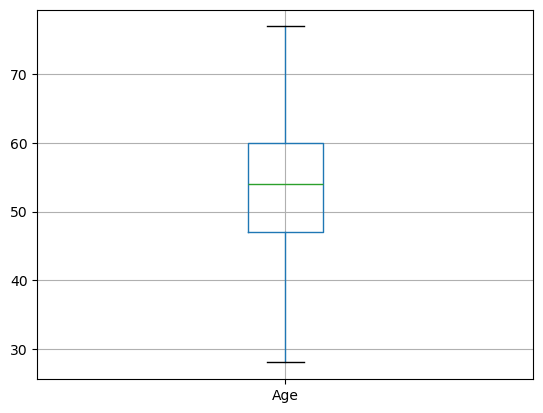

In [2]:

data.boxplot(column=["Age"])
plt.show()

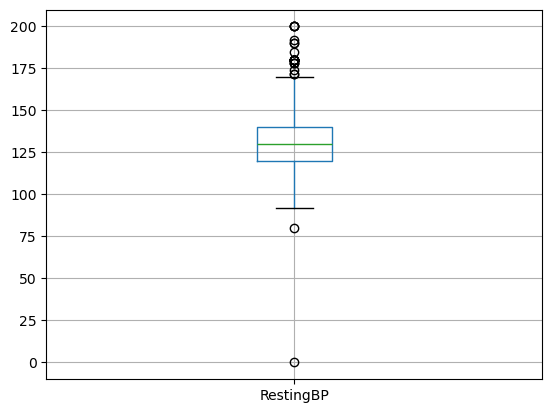

In [3]:
data.boxplot(column=["RestingBP"])
plt.show()

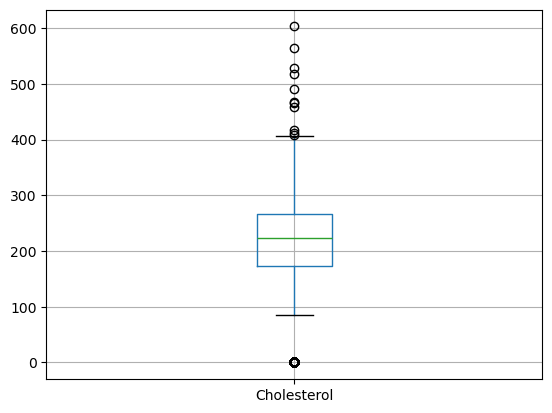

In [4]:
data.boxplot(column=["Cholesterol"])
plt.show()

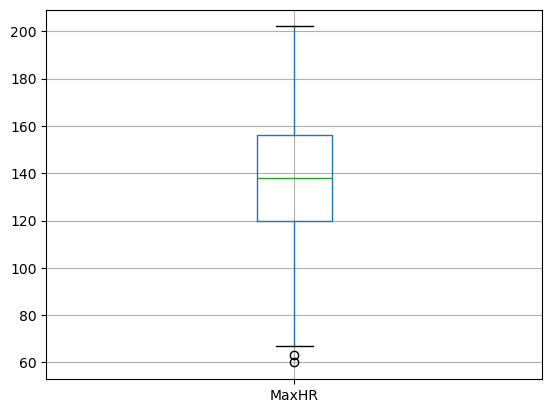

In [5]:
data.boxplot(column=["MaxHR"])
plt.show()

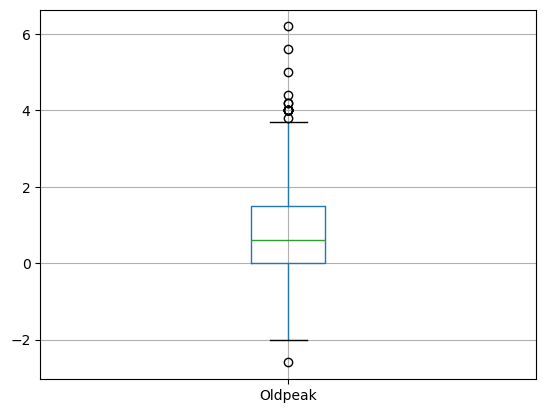

In [6]:
data.boxplot(column=["Oldpeak"])
plt.show()

In [7]:
def outlier (data,age):
 Q1 = data[age].quantile(0.25)
 Q3 = data[age].quantile(0.75)
 IQR = Q3 - Q1
 data= data.loc[~((data[age] < (Q1 - 1.5 * IQR)) | (data[age] > (Q3 + 1.5 * IQR))),]
 return data


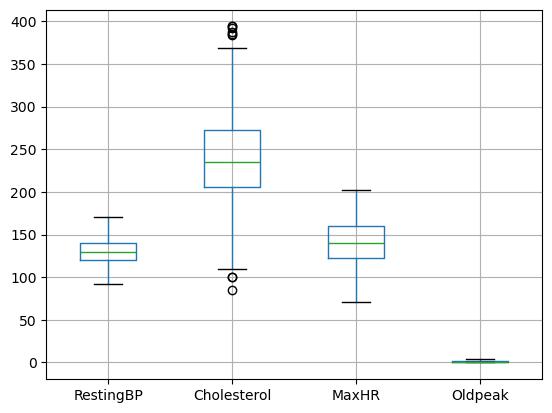

In [8]:
data=outlier(data,"RestingBP")
data=outlier(data,"Cholesterol")
data=outlier(data,"MaxHR")
data=outlier(data,"Oldpeak")

data.boxplot(column=["RestingBP","Cholesterol","MaxHR","Oldpeak"])
plt.show()

In [9]:
data.isnull().sum()#show is any variable has any missing value


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data = pd.get_dummies(data=data,
columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],
drop_first=True)


In [11]:
data.columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [12]:
data=data.astype(float)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
train_cols = data.loc[:,['Age',
  'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
   'ExerciseAngina_Y']]

train_cols.head()


,Age,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y
0,40.0,172.0,0.0,1.0,1.0,0.0,0.0,0.0
1,49.0,156.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37.0,98.0,0.0,1.0,1.0,0.0,0.0,0.0
3,48.0,108.0,1.5,0.0,0.0,0.0,0.0,1.0
4,54.0,122.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
#train_cols.head()
# model
logit = sm.Logit(data['HeartDisease'], train_cols)
# fit the model
result = logit.fit()
result.summary()#all p values are significant


Optimization terminated successfully.
         Current function value: 0.394815
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  701
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 Sep 2025   Pseudo R-squ.:                  0.4280
Time:                        14:42:07   Log-Likelihood:                -276.77
converged:                       True   LL-Null:                       -483.89
Covariance Type:            nonrobust   LLR p-value:                 2.094e-85
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0179      0.008      2.232      0.026       0.002       0.034
MaxHR                -0.0173      0.003     -5.673      0.000      -0.023      -0.011
Oldpeak               0.8182      0.131      6.247      0.000       0.562       1.075
Sex_M                 1.3278      0.266      4.986      0.000       0.806       1.850
ChestPainType_ATA    -1.9615      0.318     -6.163      0.000      -2.585      -1.338
ChestPainType_NAP    -1.4188      0.263     -5.389      0.000      -1.935      -0.903
ChestPainType_TA     -1.1402      0.430     -2.653      0.008      -1.983      -0.298
ExerciseAngina_Y      1.1733      0.240      4.890      0.000       0.703       1.644
=====================================================================================
"""

In [15]:
var = pd.DataFrame(round(result.pvalues,3))# shows p value
var["coeff"] = result.params#coefficients
#rename columns
var.columns.values[[0,1]]= ["p value","coefficients"]
var
cov = result.cov_params()
std_err = np.sqrt(np.diag(cov))
var["z"]=result.params.values/std_err
var
# end of may not run this code

,p value,coefficients,z
Age,0.026,0.017921,2.232260
MaxHR,0.000,-0.017304,-5.673383
Oldpeak,0.000,0.818243,6.247301
Sex_M,0.000,1.327789,4.985929
ChestPainType_ATA,0.000,-1.961478,-6.162528
ChestPainType_NAP,0.000,-1.418755,-5.389248
ChestPainType_TA,0.008,-1.140180,-2.652708
ExerciseAngina_Y,0.000,1.173294,4.889618


In [16]:
result.conf_int()# confidence interval

,0,1
Age,0.002186,0.033656
MaxHR,-0.023283,-0.011326
Oldpeak,0.561536,1.074951
Sex_M,0.805836,1.849741
ChestPainType_ATA,-2.585318,-1.337639
ChestPainType_NAP,-1.934729,-0.902782
ChestPainType_TA,-1.982607,-0.297754
ExerciseAngina_Y,0.702988,1.643599


In [58]:
### VIF Calculation
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


result=sm.ols(formula="HeartDisease~Age+RestingBP+Cholesterol+FastingBS+MaxHR+Oldpeak+Q('Sex_M')+Q('ChestPainType_ATA')+Q('ChestPainType_NAP')+Q('ChestPainType_TA')+Q('RestingECG_Normal')+Q('RestingECG_ST')+Q('ExerciseAngina_Y')+Q('ST_Slope_Flat')",
             data=data).fit()
result.summary()# shows total summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     84.67
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          1.66e-153
Time:                        16:33:35   Log-Likelihood:                -276.18
No. Observations:                 918   AIC:                             582.4
Df Residuals:                     903   BIC:                             654.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3243      0.146      2.228      0.026       0.039       0.610
Age                        0.0025      0.001      1.848      0.065      -0.000       0.005
RestingBP               1.979e-05      0.001      0.032      0.975      -0.001       0.001
Cholesterol               -0.0005      0.000     -4.925      0.000      -0.001      -0.000
FastingBS                  0.1423      0.027      5.190      0.000       0.088       0.196
MaxHR                     -0.0008      0.001     -1.556      0.120      -0.002       0.000
Oldpeak                    0.0687      0.012      5.840      0.000       0.046       0.092
Q('Sex_M')                 0.1597      0.028      5.689      0.000       0.105       0.215
Q('ChestPainType_ATA')    -0.2558      0.034     -7.510      0.000      -0.323      -0.189
Q('ChestPainType_NAP')    -0.2318      0.029     -7.869      0.000      -0.290      -0.174
Q('ChestPainType_TA')     -0.1891      0.053     -3.583      0.000      -0.293      -0.086
Q('RestingECG_Normal')    -0.0230      0.029     -0.783      0.434      -0.080       0.035
Q('RestingECG_ST')        -0.0253      0.036     -0.705      0.481      -0.096       0.045
Q('ExerciseAngina_Y')      0.1474      0.028      5.312      0.000       0.093       0.202
Q('ST_Slope_Flat')         0.3209      0.025     12.873      0.000       0.272       0.370
==============================================================================
Omnibus:                       16.966   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.720
Skew:                          -0.221   Prob(JB):                     1.92e-05
Kurtosis:                       3.610   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#remove variable based on vif
#all vif values are under 2, hence no variable is removed

var = pd.DataFrame(round(result.pvalues,3))# shows p value
var["coeff"] = result.params#coefficients
variables = result.model.exog #.if I had saved data as rock
# this it would have looked like rock.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
var["vif"] = vif
var

,0,coeff,vif
Intercept,0.026,0.324306,179.004600
Age,0.065,0.002516,1.391966
RestingBP,0.975,0.000020,1.118192
Cholesterol,0.000,-0.000543,1.229496
FastingBS,0.000,0.142313,1.135982
MaxHR,0.120,-0.000827,1.545603
Oldpeak,0.000,0.068745,1.330672
Q('Sex_M'),0.000,0.159664,1.104913
Q('ChestPainType_ATA'),0.000,-0.255824,1.499712
Q('ChestPainType_NAP'),0.000,-0.231841,1.263286


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

inputData=train_cols # ind var
outputData=data.loc[:,"HeartDisease"] # dep var

logit1=LogisticRegression()
logit1.fit(inputData,outputData)
logit1.score(inputData,outputData)


0.8104575163398693

In [61]:
y_pred = logit1.predict(train_cols)
prob = logit1.predict_proba(train_cols)
#prob.count()
#transform the probabilities into DataFrame
# it shows probability for both
prob = pd.DataFrame(prob)
prob = prob.iloc[:,1]#showing the probability of being 1
prob = prob.reset_index()
prob.head()

,index,1
0,0,0.072572
1,1,0.104915
2,2,0.208519
3,3,0.811284
4,4,0.325557


In [62]:
outputData = pd.DataFrame(outputData)
outputData.head()
outputData = outputData.reset_index()
outputData = outputData.iloc[:,1]
outputData.head()


0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: HeartDisease, dtype: float64

In [63]:
rock = pd.concat([outputData,prob], axis=1)
rock = rock.iloc[:,[0,2]]#this line might give error, check the column index
rock.head()
df = rock.copy()
df.columns = ["y","p"]
df.head()

,y,p
0,0.0,0.072572
1,1.0,0.104915
2,0.0,0.208519
3,1.0,0.811284
4,0.0,0.325557


In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(logit1.predict(inputData),outputData)# this is experimental not required

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(logit1.predict(inputData),outputData))
print(classification_report(logit1.predict(inputData),outputData))


[[315  79]
 [ 95 429]]
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78       394
         1.0       0.84      0.82      0.83       524

    accuracy                           0.81       918
   macro avg       0.81      0.81      0.81       918
weighted avg       0.81      0.81      0.81       918



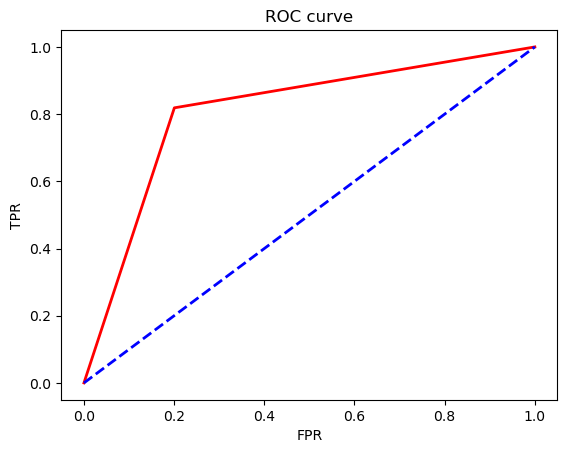

np.float64(0.8090973379315689)

In [65]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(logit1.predict(inputData),outputData,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
roc_auc_score(logit1.predict(inputData),outputData)


In [66]:
## ks stat
df = rock.copy()
df.columns = ["y","p"]
df.head()

new = df.copy()
new.columns = ["Churn","Prob"]
new.head()

new['decile'] = pd.qcut(new['Prob'],10,
labels=['1','2','3','4','5','6','7','8','9','10'])
new.head()

new.columns = ['Defaulter','Probability','Decile']
new.head()
new['Non-Defaulter'] = 1-new['Defaulter']
new.head()


boogieman = pd.pivot_table(data=new,index=['Decile'],
values=['Defaulter','Non-Defaulter','Probability'],
aggfunc={'Defaulter':[np.sum],'Non-Defaulter':[np.sum],
'Probability' : [np.min,np.max]})
boogieman.head()
boogieman.reset_index()

boogieman.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
boogieman['Total_Cust'] = boogieman['Defaulter_Count']+boogieman['Non-Defaulter_Count']
boogieman

kane = boogieman.sort_values(by='min_score',ascending=False)
kane


kane['Default_Rate'] = (kane['Defaulter_Count'] / 
kane['Total_Cust']).apply('{0:.2%}'.format)
default_sum = kane['Defaulter_Count'].sum()
non_default_sum = kane['Non-Defaulter_Count'].sum()
kane['Default %'] = (kane['Defaulter_Count']/
default_sum).apply('{0:.2%}'.format)
kane['Non_Default %'] = (kane['Non-Defaulter_Count']/
non_default_sum).apply('{0:.2%}'.format)
kane

kane['ks_stats'] = np.round(((kane['Defaulter_Count'] / 
kane['Defaulter_Count'].sum()).cumsum() -
(kane['Non-Defaulter_Count'] / 
kane['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
kane

flag = lambda x: '*****' if x == kane['ks_stats'].max() else ''
kane['max_ks'] = kane['ks_stats'].apply(flag)
kane


C:\Users\sonim\AppData\Local\Temp\ipykernel_28868\1037361874.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  boogieman = pd.pivot_table(data=new,index=['Decile'],
C:\Users\sonim\AppData\Local\Temp\ipykernel_28868\1037361874.py:20: FutureWarning: The provided callable <function sum at 0x00000121A285E8E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  boogieman = pd.pivot_table(data=new,index=['Decile'],
C:\Users\sonim\AppData\Local\Temp\ipykernel_28868\1037361874.py:20: FutureWarning: The provided callable <function min at 0x00000121A285F420> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mi

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
Decile,,,,,,,,,,
10,90.0,2.0,0.995064,0.953062,92.0,97.83%,17.72%,0.49%,17.23,
9,85.0,7.0,0.952944,0.921164,92.0,92.39%,16.73%,1.71%,32.25,
8,81.0,11.0,0.920925,0.856540,92.0,88.04%,15.94%,2.68%,45.52,
7,77.0,14.0,0.856240,0.738783,91.0,84.62%,15.16%,3.41%,57.26,
6,62.0,30.0,0.738514,0.601206,92.0,67.39%,12.20%,7.32%,62.15,*****
5,50.0,42.0,0.596979,0.444787,92.0,54.35%,9.84%,10.24%,61.74,
4,34.0,57.0,0.443705,0.286487,91.0,37.36%,6.69%,13.90%,54.54,
3,18.0,74.0,0.283714,0.155444,92.0,19.57%,3.54%,18.05%,40.03,
2,6.0,86.0,0.155112,0.082103,92.0,6.52%,1.18%,20.98%,20.24,


In [67]:
## merging data and probability score

df = rock.copy()
df.columns = ["y","p"]
df.reset_index(inplace=True)
df.head()

kane = data.copy()
kane.reset_index(inplace=True)
kane.head()

final = pd.concat([df,kane],axis=1)
final.head()

,index,y,p,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0,0.0,0.072572,0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1.0,0.104915,1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,0.0,0.208519,2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,1.0,0.811284,3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,4,0.0,0.325557,4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [68]:
final.to_csv('heartdiseaseassign.csv',index=False)#export data to local drive